# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).

In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


In [1]:
# importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\saura\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA


In [5]:
# reading data into dataframe
telco= pd.read_csv("F:/telco_csv.csv")

In [6]:
telco.head(10)
telco.shape

(1000, 30)

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [8]:
telco.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,1.000000,4.000000


In [9]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat']
[]


In [10]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [11]:
telco_cat = telco[cat_var_names]
telco_cat.head(5)

""
0
1
2
3
4


In [12]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(var_summary)

In [13]:
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,1000.0,0.0,2022.0,2.0220,2.000,0.816200,0.666182,1.0,1.00,1.0000,1.000,1.0,2.000,3.0000,3.000,3.0000,3.0000,3.00
tenure,1000.0,0.0,35526.0,35.5260,34.000,21.359812,456.241566,1.0,1.00,4.0000,7.000,17.0,34.000,54.0000,66.000,70.0000,72.0000,72.00
age,1000.0,0.0,41684.0,41.6840,40.000,12.558816,157.723868,18.0,20.00,23.0000,26.000,32.0,40.000,51.0000,59.000,64.0000,70.0100,77.00
marital,1000.0,0.0,495.0,0.4950,0.000,0.500225,0.250225,0.0,0.00,0.0000,0.000,0.0,0.000,1.0000,1.000,1.0000,1.0000,1.00
address,1000.0,0.0,11551.0,11.5510,9.000,10.086681,101.741140,0.0,0.00,0.0000,1.000,3.0,9.000,18.0000,26.100,31.0000,43.0000,55.00
income,1000.0,0.0,77535.0,77.5350,47.000,107.044165,11458.453228,9.0,10.99,18.0000,21.000,29.0,47.000,83.0000,155.400,232.2500,460.4800,1668.00
ed,1000.0,0.0,2671.0,2.6710,3.000,1.222397,1.494253,1.0,1.00,1.0000,1.000,2.0,3.000,4.0000,4.000,5.0000,5.0000,5.00
employ,1000.0,0.0,10987.0,10.9870,8.000,10.082087,101.648479,0.0,0.00,0.0000,0.000,3.0,8.000,17.0000,25.000,31.0000,40.0100,47.00
retire,1000.0,0.0,47.0,0.0470,0.000,0.211745,0.044836,0.0,0.00,0.0000,0.000,0.0,0.000,0.0000,0.000,0.0000,1.0000,1.00
gender,1000.0,0.0,517.0,0.5170,1.000,0.499961,0.249961,0.0,0.00,0.0000,0.000,0.0,1.000,1.0000,1.000,1.0000,1.0000,1.00


In [89]:
# data preprocessing (missing value,outlier treatment)

In [14]:
#Handling Outliers - at 99%tile or 95%tile if required after including some particular vars like income
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

telco_num=telco_num.apply(lambda x: outlier_capping(x))

In [15]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [16]:
telco_num.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,...,0.010620,0.017541,-0.017269,0.001482,0.020740,-0.014371,-0.005019,0.009639,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,...,0.086777,0.085884,0.133585,0.755250,0.239342,-0.064180,0.445672,0.095382,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,...,0.074877,0.082868,0.122958,0.409538,0.184097,-0.126281,0.288360,0.039280,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,...,0.023712,0.043866,0.006040,0.132886,0.063841,0.013961,0.107968,0.051942,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,...,0.058743,0.080751,0.089632,0.471009,0.163823,-0.115242,0.275419,0.014713,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,...,0.144545,0.143558,0.174063,0.244525,0.208104,0.014707,0.169074,0.154315,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,...,0.014027,0.029790,0.016628,-0.094830,-0.009181,0.462110,-0.065124,0.320090,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,...,0.151557,0.116052,0.168114,0.464180,0.247376,-0.161682,0.287433,0.037884,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,...,0.049210,0.036188,0.060538,0.256609,0.092848,-0.093175,0.111980,-0.026163,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,...,-0.031012,-0.035548,-0.002137,0.005925,0.000980,0.001961,-0.023430,0.011810,-0.015771,-0.004966


### Standardizing data 
- To put data on the same scale 

In [17]:
telco_num.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [18]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)

telco_num.drop(['region','tenure','marital','address','ed','employ','retire','gender','custcat'], axis=1, inplace=True)

In [19]:
telco_num.shape
telco_num.columns

Index(['age', 'income', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill'],
      dtype='object')

In [20]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)

In [21]:
pd.DataFrame(telco_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.189446,-0.126231,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-0.695476,0.802534,2.607427,1.053425,-0.792884,0.689149,1.542199,-0.951190,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,0.833025,0.544543,-0.229045,1.053425,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.695476,-0.526115,-0.938163,-0.949284,-0.792884,-1.451065,-0.648425,-0.951190,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.936819,-0.564814,1.189191,-0.949284,-0.792884,-1.451065,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
5,-0.212792,0.054362,-0.938163,1.053425,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,-1.004008,0.025619,0.390189,-0.749071,-0.009650,-0.598794,-0.768001
6,-1.580398,-0.706708,1.898309,-0.949284,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,-0.962695,1.030464,-0.986097,-1.004008,-0.070102,-0.824695,-0.749071,-0.364289,-0.598794,1.302082
7,-0.534581,0.028563,0.480073,1.053425,1.261219,0.689149,1.542199,1.051315,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.585931,2.015295,1.899915,0.718293,2.809212,1.302082
8,1.396158,1.189519,1.898309,1.053425,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,1.038750,1.030464,1.014099,0.996008,-0.192412,0.973965,-0.749071,-0.121641,-0.598794,-0.768001
9,-0.051897,-0.023035,0.480073,-0.949284,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,1.339121,-0.824695,-0.749071,0.214332,-0.598794,-0.768001


In [22]:
pd.DataFrame(telco_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.602674e-17,4.113376e-17,-1.275091e-16,5.364598e-16,-2.933209e-16,-1.045830e-16,-2.160494e-16,-1.763034e-16,4.851675e-17,1.920686e-16,...,-2.176037e-17,2.331468e-18,-5.118128e-17,-2.153833e-17,-7.077672e-18,7.649437e-17,-2.380318e-16,-9.711676e-17,-2.975398e-17,2.264855e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.741293e+00,-8.100333e-01,-9.381632e-01,-9.492843e-01,-7.928837e-01,-1.451065e+00,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-1.053899e+00,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
25%,-7.759238e-01,-5.777133e-01,-9.381632e-01,-9.492843e-01,-7.928837e-01,-1.451065e+00,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-6.763338e-01,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
50%,-1.323441e-01,-3.455222e-01,-2.290451e-01,-9.492843e-01,-7.928837e-01,6.891489e-01,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,9.960080e-01,-3.226987e-01,-8.246952e-01,-7.490708e-01,-1.216411e-01,-5.987943e-01,-7.680007e-01
75%,7.525780e-01,1.188599e-01,4.800729e-01,1.053425e+00,1.261219e+00,6.891489e-01,1.542199e+00,1.051315e+00,1.513101e+00,1.682682e+00,...,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,3.034748e-01,7.057438e-01,9.151374e-01,5.129756e-01,6.988998e-01,1.302082e+00
max,2.281884e+00,4.988164e+00,2.607427e+00,1.053425e+00,1.261219e+00,6.891489e-01,1.542199e+00,1.051315e+00,1.513101e+00,1.682682e+00,...,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,4.292373e+00,3.183793e+00,2.500299e+00,3.611398e+00,2.988408e+00,1.302082e+00


### Applyting PCA (for combining common features and thus reducing total no. of feature columns)

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly 
uncorrelated variables called principal components

In [23]:
pc = PCA(n_components=21)

In [24]:
pc.fit(telco_scaled)

PCA(n_components=21)

In [25]:
pc.explained_variance_  #Eigen value

array([6.48014217, 3.79763512, 1.9990277 , 1.19064965, 0.91842386,
       0.83059868, 0.74528646, 0.59603104, 0.55247197, 0.5241544 ,
       0.47570563, 0.45279093, 0.43637905, 0.4180262 , 0.3877597 ,
       0.35851796, 0.34855264, 0.28674086, 0.12417744, 0.07026185,
       0.02768769])

In [26]:
#Eigen values
sum(pc.explained_variance_)

21.021021021021028

In [27]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([0.30826962, 0.18065893, 0.0950966 , 0.0566409 , 0.04369074,
       0.03951277, 0.03545434, 0.02835405, 0.02628188, 0.02493477,
       0.02263   , 0.02153991, 0.02075917, 0.0198861 , 0.01844628,
       0.01705521, 0.01658115, 0.01364067, 0.0059073 , 0.00334246,
       0.00131714])

In [28]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 30.83,  48.9 ,  58.41,  64.07,  68.44,  72.39,  75.94,  78.78,
        81.41,  83.9 ,  86.16,  88.31,  90.39,  92.38,  94.22,  95.93,
        97.59,  98.95,  99.54,  99.87, 100.  ])

In [29]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,22))

,Eigen_value,Cumm_variance
1,6.480142,30.83
2,3.797635,48.90
3,1.999028,58.41
4,1.190650,64.07
5,0.918424,68.44
6,0.830599,72.39
7,0.745286,75.94
8,0.596031,78.78
9,0.552472,81.41
10,0.524154,83.90


Approach 1: Try to trade-off between independent components (eigen value =1) and cummulative variance (around ~ 70%)

Approach 2: number of components have choosen as 6 based on cumulative variance is explaining >75 % and individual component explaining >0.8 variance

In [30]:
pc_final=PCA(n_components=6).fit(telco_scaled)

In [31]:
pc_final.explained_variance_

array([6.48014217, 3.79763512, 1.99902739, 1.1906469 , 0.91838826,
       0.83056635])

In [32]:
reduced_cr=pc_final.fit_transform(telco_scaled)  # the out put is Factors (F1, F2, ...F6)

In [33]:
dimensions = pd.DataFrame(reduced_cr)

In [34]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [35]:
print(dimensions.shape)
#pd.DataFrame(telco_scaled).head()
print(dimensions.head())

(1000, 6)
         C1        C2        C3        C4        C5        C6
0 -2.314478  0.901833 -0.291962  0.141006 -0.753692  0.987240
1  2.996664  1.234864 -2.262424 -1.318582  1.513140  2.521341
2  0.177205  2.967502  0.307248  0.213980 -0.518014 -0.264692
3 -3.438187 -0.031652 -0.771620  0.753830 -0.079929  0.436443
4 -1.801871  0.725643 -2.318952 -0.434945  0.801027  0.177435


## Clustering/ Segmentation

In [36]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [37]:
km_3.labels_

array([2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2,
       1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0,

In [38]:
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
#km_5.labels_

km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)
#km_5.labels_

In [39]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [40]:
telco_num.head(20)

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,44.0,64.0,2,0,0,1,0,0,0,0,...,0.00,7.50,0.00,0,2,3,4,3,6,5
1,33.0,136.0,6,1,0,1,1,0,1,1,...,0.00,15.25,35.70,0,1,2,1,4,3,4
2,52.0,116.0,2,1,0,1,0,0,0,0,...,0.00,30.25,0.00,0,0,1,1,0,1,3
3,33.0,33.0,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0,2,3,4,3,6,5
4,30.0,30.0,4,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0,2,3,4,3,6,5
5,39.0,78.0,1,1,0,1,0,0,0,0,...,0.00,13.50,0.00,0,0,1,1,0,1,3
6,22.0,19.0,5,0,0,1,0,1,0,0,...,0.00,8.75,0.00,1,2,0,3,1,2,0
7,35.0,76.0,3,1,1,1,1,1,1,1,...,50.10,23.25,64.90,1,1,2,2,5,5,1
8,59.0,166.0,5,1,0,1,0,1,0,0,...,0.00,12.00,0.00,0,0,1,1,0,1,6
9,41.0,72.0,3,0,0,1,0,1,0,0,...,0.00,16.50,0.00,0,2,3,0,2,0,2


In [41]:
km_3.cluster_centers_

array([[ 0.70140602,  2.13255282, -0.30422366,  0.07264978, -0.03328843,
        -0.40121838],
       [ 3.52189604, -1.37312477, -0.06277796, -0.03120808,  0.01126545,
         0.31405289],
       [-2.14090325, -0.64631545,  0.2177295 , -0.0295742 ,  0.01502351,
         0.09456043]])

In [42]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.476
0    0.293
1    0.231
dtype: float64

In [43]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.318
1    0.264
2    0.209
0    0.209
dtype: float64

In [44]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.250
4    0.201
2    0.195
3    0.190
0    0.164
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [45]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(dimensions, km_6.labels_)

0.25633858876553917

In [46]:
# calculate SC for K=3 through K=12
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

In [47]:
scores

[0.3034712231046537,
 0.2971529755101035,
 0.2639174862119189,
 0.2600271869935228,
 0.25633858876553917,
 0.24679205491097278,
 0.24531291095893346,
 0.23823756079343053,
 0.22811082253324944,
 0.22740530645539475,
 0.21883941149637545,
 0.22954088022667185,
 0.21517834609119274,
 0.2147473112326908]

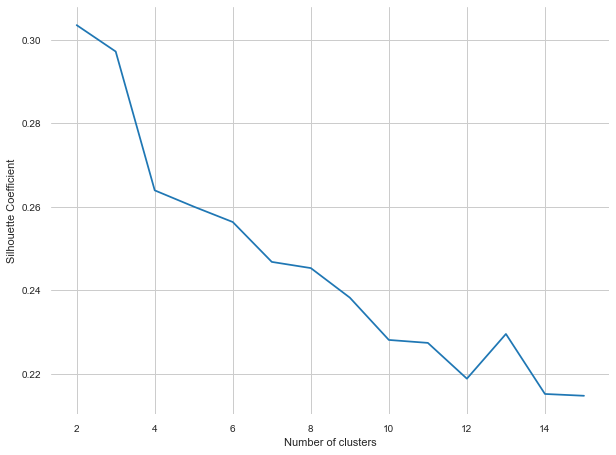

In [48]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution is best

### Segment Distribution

### Finding Optimal number of clusters (optional)

### Elbow Analysis 

In [49]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [50]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,10287.853583
1,3,7915.729868
2,4,6792.284912
3,5,6052.448748
4,6,5484.240725
5,7,5126.440451
6,8,4804.681354
7,9,4555.870292
8,10,4365.594794
9,11,4149.797528


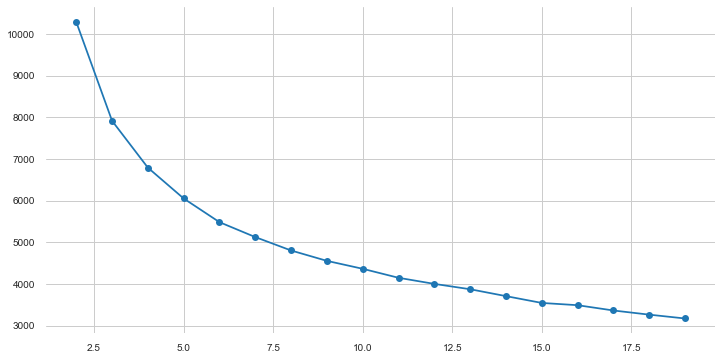

In [51]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

In [52]:
telco_num.cluster_6.value_counts()/sum(telco_num.cluster_5.value_counts())

0    0.218
1    0.185
3    0.177
5    0.176
2    0.156
4    0.088
Name: cluster_6, dtype: float64

In [53]:
km_6.cluster_centers_

array([[ 0.50521074,  2.0956702 , -0.80841528, -0.05209128, -0.26054124,
        -0.63819102],
       [-1.29260576, -2.36226278,  0.39082317,  0.08160973, -0.05981954,
        -0.52025693],
       [-1.89119753,  0.98994328,  1.63355408, -0.46324008, -0.3147543 ,
         0.49312842],
       [-2.79056292, -0.09389037, -0.92103342,  0.20400359,  0.37275043,
         0.38207536],
       [ 3.11327098,  1.74075317,  0.65453535,  0.52665778,  0.95997462,
         0.68044859],
       [ 3.65900414, -1.76611548, -0.25839994, -0.07915323, -0.19027453,
         0.17578595]])

# Profiling

In [54]:
telco_num.head()

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,44.0,64.0,2,0,0,1,0,0,0,0,...,0.0,7.50,0.0,0,2,3,4,3,6,5
1,33.0,136.0,6,1,0,1,1,0,1,1,...,0.0,15.25,35.7,0,1,2,1,4,3,4
2,52.0,116.0,2,1,0,1,0,0,0,0,...,0.0,30.25,0.0,0,0,1,1,0,1,3
3,33.0,33.0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,4,3,6,5
4,30.0,30.0,4,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,4,3,6,5


In [55]:
telco_num.cluster_3.value_counts()/sum(telco_num.cluster_3.value_counts())

2    0.476
0    0.293
1    0.231
Name: cluster_3, dtype: float64

In [56]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

2    47.6
0    29.3
1    23.1
Name: cluster_3, dtype: float64

In [57]:
pd.Series.sort_index(telco_num.cluster_5.value_counts())

0    164
1    250
2    195
3    190
4    201
Name: cluster_5, dtype: int64

In [58]:
telco_num.cluster_3.size

1000

In [59]:
telco_num.cluster_3.value_counts()/telco_num.cluster_3.size

2    0.476
0    0.293
1    0.231
Name: cluster_3, dtype: float64

In [60]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [61]:
size

0    1000
0     293
1     231
2     476
0     209
1     264
2     209
3     318
0     164
1     250
2     195
3     190
4     201
0     218
1     185
2     156
3     177
4      88
5     176
0     154
1     214
2     144
3      81
4      84
5     144
6     179
0     148
1     124
2     149
3     173
4      82
5     173
6      66
7      85
dtype: int64

In [62]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])

In [63]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.293,0.231,0.476,0.209,0.264,0.209,0.318,0.164,0.25,...,0.144,0.179,0.148,0.124,0.149,0.173,0.082,0.173,0.066,0.085


In [64]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,293.000,231.000,476.000,209.000,264.000,209.000,318.000,164.000,250.00,...,144.000,179.000,148.000,124.000,149.000,173.000,82.000,173.000,66.000,85.000
Seg_Pct,1.0,0.293,0.231,0.476,0.209,0.264,0.209,0.318,0.164,0.25,...,0.144,0.179,0.148,0.124,0.149,0.173,0.082,0.173,0.066,0.085


In [65]:
telco_num.head()

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,44.0,64.0,2,0,0,1,0,0,0,0,...,0.0,7.50,0.0,0,2,3,4,3,6,5
1,33.0,136.0,6,1,0,1,1,0,1,1,...,0.0,15.25,35.7,0,1,2,1,4,3,4
2,52.0,116.0,2,1,0,1,0,0,0,0,...,0.0,30.25,0.0,0,0,1,1,0,1,3
3,33.0,33.0,1,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,4,3,6,5
4,30.0,30.0,4,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,4,3,6,5


In [66]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [67]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
age,41.645100,45.710034,40.203463,39.842563,37.234450,45.928182,40.478469,41.754906,49.524817,46.02008,...,39.618056,35.536369,37.587838,41.782258,49.107785,42.300636,40.902439,35.520289,57.076061,35.294118
income,73.785700,89.598328,88.369870,56.974685,55.617129,92.503144,88.734163,60.363050,88.350488,94.94924,...,78.947778,44.659050,54.270203,93.322258,75.375839,60.022832,91.152195,44.739711,196.247879,51.764588
reside,2.323000,2.170648,2.562771,2.300420,2.263158,2.159091,2.531100,2.361635,2.152439,2.22800,...,2.493056,2.430168,2.141892,2.282258,2.201342,2.173410,2.878049,2.445087,1.939394,2.729412
tollfree,0.474000,0.856655,0.813853,0.073529,0.090909,0.920455,0.875598,0.091195,0.097561,0.94000,...,0.958333,0.083799,0.081081,0.943548,0.073826,0.878613,0.951220,0.075145,0.878788,0.388235
equip,0.386000,0.061433,0.835498,0.367647,0.904306,0.071970,0.827751,0.015723,0.067073,0.05200,...,0.916667,0.055866,0.925676,0.983871,0.060403,0.063584,0.121951,0.057803,0.106061,0.941176
callcard,0.678000,0.897611,0.878788,0.445378,0.358852,0.890152,0.909091,0.559748,1.000000,0.95600,...,0.923611,0.145251,0.290541,0.927419,1.000000,0.849711,0.975610,0.115607,0.969697,0.705882
wireless,0.296000,0.191126,0.956710,0.039916,0.167464,0.212121,0.976077,0.003145,0.006098,0.27600,...,0.993056,0.000000,0.047297,1.000000,0.000000,0.063584,0.878049,0.000000,0.242424,0.776471
multline,0.475000,0.365188,0.696970,0.434874,0.631579,0.375000,0.684211,0.317610,0.560976,0.36800,...,0.694444,0.139665,0.648649,0.766129,0.557047,0.184971,0.378049,0.144509,0.833333,0.682353
voice,0.304000,0.221843,0.857143,0.086134,0.234450,0.234848,0.870813,0.034591,0.048780,0.28800,...,0.902778,0.027933,0.148649,0.903226,0.026846,0.115607,0.768293,0.034682,0.348485,0.635294
pager,0.261000,0.143345,0.839827,0.052521,0.148325,0.170455,0.866029,0.012579,0.024390,0.22800,...,0.916667,0.022346,0.067568,0.943548,0.013423,0.046243,0.731707,0.023121,0.181818,0.564706


In [68]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [69]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.000000,293.000000,231.000000,476.000000,209.000000,264.000000,209.000000,318.000000,164.000000,250.00000,...,144.000000,179.000000,148.000000,124.000000,149.000000,173.000000,82.000000,173.000000,66.000000,85.000000
Seg_Pct,1.000000,0.293000,0.231000,0.476000,0.209000,0.264000,0.209000,0.318000,0.164000,0.25000,...,0.144000,0.179000,0.148000,0.124000,0.149000,0.173000,0.082000,0.173000,0.066000,0.085000
age,41.645100,45.710034,40.203463,39.842563,37.234450,45.928182,40.478469,41.754906,49.524817,46.02008,...,39.618056,35.536369,37.587838,41.782258,49.107785,42.300636,40.902439,35.520289,57.076061,35.294118
income,73.785700,89.598328,88.369870,56.974685,55.617129,92.503144,88.734163,60.363050,88.350488,94.94924,...,78.947778,44.659050,54.270203,93.322258,75.375839,60.022832,91.152195,44.739711,196.247879,51.764588
reside,2.323000,2.170648,2.562771,2.300420,2.263158,2.159091,2.531100,2.361635,2.152439,2.22800,...,2.493056,2.430168,2.141892,2.282258,2.201342,2.173410,2.878049,2.445087,1.939394,2.729412
tollfree,0.474000,0.856655,0.813853,0.073529,0.090909,0.920455,0.875598,0.091195,0.097561,0.94000,...,0.958333,0.083799,0.081081,0.943548,0.073826,0.878613,0.951220,0.075145,0.878788,0.388235
equip,0.386000,0.061433,0.835498,0.367647,0.904306,0.071970,0.827751,0.015723,0.067073,0.05200,...,0.916667,0.055866,0.925676,0.983871,0.060403,0.063584,0.121951,0.057803,0.106061,0.941176
callcard,0.678000,0.897611,0.878788,0.445378,0.358852,0.890152,0.909091,0.559748,1.000000,0.95600,...,0.923611,0.145251,0.290541,0.927419,1.000000,0.849711,0.975610,0.115607,0.969697,0.705882
wireless,0.296000,0.191126,0.956710,0.039916,0.167464,0.212121,0.976077,0.003145,0.006098,0.27600,...,0.993056,0.000000,0.047297,1.000000,0.000000,0.063584,0.878049,0.000000,0.242424,0.776471
multline,0.475000,0.365188,0.696970,0.434874,0.631579,0.375000,0.684211,0.317610,0.560976,0.36800,...,0.694444,0.139665,0.648649,0.766129,0.557047,0.184971,0.378049,0.144509,0.833333,0.682353


In [70]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [71]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,293.000000,231.000000,476.000000,209.000000,264.000000,209.000000,318.000000,164.000000,250.00000,...,144.000000,179.000000,148.000000,124.000000,149.000000,173.000000,82.000000,173.000000,66.000000,85.000000
Seg_Pct,1.000000,0.293000,0.231000,0.476000,0.209000,0.264000,0.209000,0.318000,0.164000,0.25000,...,0.144000,0.179000,0.148000,0.124000,0.149000,0.173000,0.082000,0.173000,0.066000,0.085000
age,41.645100,45.710034,40.203463,39.842563,37.234450,45.928182,40.478469,41.754906,49.524817,46.02008,...,39.618056,35.536369,37.587838,41.782258,49.107785,42.300636,40.902439,35.520289,57.076061,35.294118
income,73.785700,89.598328,88.369870,56.974685,55.617129,92.503144,88.734163,60.363050,88.350488,94.94924,...,78.947778,44.659050,54.270203,93.322258,75.375839,60.022832,91.152195,44.739711,196.247879,51.764588
reside,2.323000,2.170648,2.562771,2.300420,2.263158,2.159091,2.531100,2.361635,2.152439,2.22800,...,2.493056,2.430168,2.141892,2.282258,2.201342,2.173410,2.878049,2.445087,1.939394,2.729412
tollfree,0.474000,0.856655,0.813853,0.073529,0.090909,0.920455,0.875598,0.091195,0.097561,0.94000,...,0.958333,0.083799,0.081081,0.943548,0.073826,0.878613,0.951220,0.075145,0.878788,0.388235
equip,0.386000,0.061433,0.835498,0.367647,0.904306,0.071970,0.827751,0.015723,0.067073,0.05200,...,0.916667,0.055866,0.925676,0.983871,0.060403,0.063584,0.121951,0.057803,0.106061,0.941176
callcard,0.678000,0.897611,0.878788,0.445378,0.358852,0.890152,0.909091,0.559748,1.000000,0.95600,...,0.923611,0.145251,0.290541,0.927419,1.000000,0.849711,0.975610,0.115607,0.969697,0.705882
wireless,0.296000,0.191126,0.956710,0.039916,0.167464,0.212121,0.976077,0.003145,0.006098,0.27600,...,0.993056,0.000000,0.047297,1.000000,0.000000,0.063584,0.878049,0.000000,0.242424,0.776471
multline,0.475000,0.365188,0.696970,0.434874,0.631579,0.375000,0.684211,0.317610,0.560976,0.36800,...,0.694444,0.139665,0.648649,0.766129,0.557047,0.184971,0.378049,0.144509,0.833333,0.682353


# Saving as csv file to do data interpreting in excel to find optimum no. of clusters

In [72]:
Profling_output_final.to_csv('Profiling_output.csv')

### Assigning segments to new data (Predicting segment for new data)

In [73]:
new_cust = pd.read_csv('F:/Telco_new_cust.csv')

In [74]:
new_cust

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,...,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,...,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,...,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,24,30,0,0,25,4,5,0,0,...,1,1,1,8.70,47.75,0.00,32.75,64.00,1,4
96,2,3,26,1,6,59,4,0,0,1,...,0,1,1,2.55,23.50,29.60,10.75,19.20,0,4
97,1,4,30,0,1,45,4,6,0,0,...,0,1,1,3.65,0.00,34.20,29.00,0.00,1,4
98,1,72,40,1,19,163,4,15,0,0,...,0,0,1,39.00,31.25,0.00,14.75,0.00,1,2


In [75]:
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,...,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,...,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,...,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2


In [76]:
new_cust1 = new_cust.drop(['tenure','marital','region','custcat','address','ed','employ','retire','gender'], axis=1)

In [77]:
new_cust1.head()

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,55,135,4,1,0,1,0,1,1,1,...,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1
1,26,41,3,0,1,1,1,1,0,0,...,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0
2,55,587,1,0,0,0,0,0,1,0,...,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0
3,40,38,1,1,1,1,1,0,1,1,...,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1
4,67,49,2,0,1,1,0,1,0,0,...,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1


In [78]:
new_cust1.columns

Index(['age', 'income', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill'],
      dtype='object')

In [79]:
telco_num.columns

Index(['age', 'income', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6',
       'cluster_7', 'cluster_8'],
      dtype='object')

In [80]:
new_cust_scaled=sc.transform(new_cust1)

In [81]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust1.columns)

In [82]:
print(new_cust_scaled.shape)
print(new_cust_scaled.head())

(100, 21)
        age    income    reside  tollfree     equip  callcard  wireless  \
0  1.074368  0.789634  1.189191  1.053425 -0.792884  0.689149 -0.648425   
1 -1.258609 -0.422919  0.480073 -0.949284  1.261219  0.689149  1.542199   
2  1.074368  6.620209 -0.938163 -0.949284 -0.792884 -1.451065 -0.648425   
3 -0.132344 -0.461618 -0.938163  1.053425  1.261219  0.689149  1.542199   
4  2.039737 -0.319723 -0.229045 -0.949284  1.261219  0.689149 -0.648425   

   multline     voice     pager  ...    callid  callwait   forward    confer  \
0  1.051315  1.513101  1.682682  ...  1.038750  1.030464  1.014099  0.996008   
1  1.051315 -0.660895 -0.594289  ... -0.962695 -0.970437 -0.986097 -1.004008   
2 -0.951190  1.513101 -0.594289  ...  1.038750  1.030464  1.014099  0.996008   
3 -0.951190  1.513101  1.682682  ...  1.038750  1.030464  1.014099  0.996008   
4  1.051315 -0.660895 -0.594289  ... -0.962695 -0.970437 -0.986097 -1.004008   

    longmon   tollmon  equipmon   cardmon   wiremon     eb

In [83]:
reduced_pred=pc_final.transform(new_cust_scaled)  # the out put is Factors (F1, F2, ...F6)
dim_pred = pd.DataFrame(reduced_pred)

dim_pred.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [84]:
centroids = km_5.cluster_centers_
centroids

array([[-1.82935948e+00,  9.79282131e-01,  1.60287882e+00,
        -4.28729586e-01, -2.89511574e-01,  4.85750669e-01],
       [ 1.25114766e+00,  2.25949000e+00, -4.09399519e-01,
         7.97103828e-02,  8.72633180e-04, -3.11181183e-01],
       [ 3.76319070e+00, -1.46023898e+00, -1.30013197e-01,
        -4.93768804e-03, -9.82013146e-02,  1.97291987e-01],
       [-1.23991917e+00, -2.38408292e+00,  3.79981718e-01,
         7.58327275e-02, -4.13597642e-02, -5.06451244e-01],
       [-2.54233584e+00,  6.09332638e-02, -1.03167264e+00,
         1.83774564e-01,  3.69499260e-01,  2.78039726e-01]])

In [85]:
km_5.predict(dim_pred)

array([1, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 0, 4, 4, 4, 4, 4, 1, 4, 1, 2,
       3, 4, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 4, 1, 4, 3, 2, 2, 1, 2, 2, 0, 2, 3, 3, 1, 0, 2, 2, 0,
       4, 1, 1, 1, 3, 0, 3, 3, 2, 2, 2, 2, 4, 1, 4, 3, 0, 1, 1, 0, 1, 0,
       0, 1, 4, 3, 1, 4, 1, 2, 2, 3, 0, 4])

In [86]:
new_cust['pred_segment'] = pd.Series(km_5.predict(dim_pred))

In [87]:
new_cust.head(20)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,pred_segment
0,1,38,55,1,12,135,2,24,0,0,...,1,1,12.15,31.75,0.00,16.25,0.00,1,4,1
1,3,59,26,1,3,41,4,1,0,1,...,0,0,12.65,0.00,35.10,46.75,29.15,0,2,3
2,2,54,55,0,1,587,3,33,0,0,...,1,1,13.00,0.00,0.00,0.00,0.00,0,3,1
3,3,9,40,0,13,38,4,7,0,1,...,1,1,3.35,21.00,42.40,17.50,59.55,1,4,2
4,1,67,67,1,38,49,2,10,0,1,...,0,0,14.30,0.00,29.25,25.25,0.00,1,2,3
5,2,24,44,0,19,33,3,0,0,1,...,0,1,4.65,0.00,26.65,0.00,0.00,1,1,3
6,2,12,55,1,13,36,1,5,0,1,...,0,0,5.95,0.00,26.55,0.00,0.00,0,2,3
7,1,26,47,0,13,54,3,0,0,0,...,0,1,7.10,16.00,38.50,18.00,23.50,1,2,2
8,2,3,32,0,4,58,2,11,0,0,...,1,0,2.75,15.75,29.50,9.25,28.55,1,4,2
9,2,20,46,0,2,23,5,4,0,1,...,1,0,4.75,0.00,0.00,0.00,0.00,1,4,3


#  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [99]:
telco_scaled.shape

(1000, 21)

In [116]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=8)
db.fit(telco_scaled)

DBSCAN(eps=1, min_samples=8)

In [117]:
pd.Series(db.labels_).value_counts()

-1    936
 0     45
 1     11
 2      8
dtype: int64

In [118]:
# review the cluster labels
db.labels_

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1,
        0, -1,  2,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1

In [119]:
# save the cluster labels and sort by cluster
telco_num['DB_cluster'] = db.labels_

In [120]:
# review the cluster centers
telco_num.groupby('DB_cluster').mean()

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
DB_cluster,,,,,,,,,,,,,,,,,,,,,
-1,41.941346,76.122543,2.331197,0.50641,0.400641,0.715812,0.316239,0.495726,0.324786,0.278846,...,14.795566,14.441239,12.182772,0.384615,1.127137,1.577991,1.924145,2.241453,2.746795,3.081197
0,35.511111,39.800000,2.400000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,3.000000,6.000000,5.000000
1,33.272727,36.454545,1.545455,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,28.950000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000
2,53.000000,42.875000,2.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14.031250,0.000000,0.000000,2.000000,3.000000,0.000000,2.000000,1.500000,2.000000
